<a href="https://www.kaggle.com/code/aadeez/2021-05-26-eda-and-data-vis-of-zomato-dataset?scriptVersionId=91722909" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# EDA and Data Visualization of Zomato Bangalore Restuarants Dataset

- toc: true
- badges: true

## Introduction

Zomato is an Indian multinational restaurant aggregator and food delivery company. In this project, we're going to study and analyze the [Zomato Dataset](https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants) shared by [Himanshu Podder](https://www.kaggle.com/himanshupoddar) on Kaggle. This dataset contains information on restaurants in the city of Bengaluru, India. We can use this dataset to get an idea of different factors affecting the restaurants in different parts of the city and also answer questions like which type of food is most popular in the city, how does the location of the restuarant affects its rating on the Zomato platform, and what relation does the rating of the restaurant and the number of cuisines it offers has?

We will use the approach of Exploratory Data Analysis (EDA) for studying this data, which is used to analyse datasets to summarize their main characteristics, often using statistical graphics and other data visualization methods. EDA can help in seeing what the data can tell us beyond the formal modeling or hypothesis testing task.[<sup>3 </sup>](https://en.wikipedia.org/wiki/Exploratory_data_analysis#:~:text=In%20statistics%2C%20exploratory,hypothesis%20testing%20task) 

The dataset can be used to answer a lot of questions but for this project, we are going to limit ourselves to 5-10 questions and then try to answer these questions.

## Setup

Import the required libraries and get the file path.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/zomato-bangalore-restaurants/zomato.csv


In [2]:
file_path = "/kaggle/input/zomato-bangalore-restaurants/zomato.csv"

!ls -lh {file_path}

-rw-r--r-- 1 nobody nogroup 548M Feb  1 14:14 /kaggle/input/zomato-bangalore-restaurants/zomato.csv


The file size of the dataset is 548MB and it is safe to import the whole dataset at once. 

In [3]:

# Read the csv file into a pandas DataFrame
df = pd.read_csv(file_path, thousands = ',')

## Data Preparation and Cleaning

### Premilinary Analysis
Evaluate the structure of the dataset

In [4]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51717 non-null  object 
 1   address                      51717 non-null  object 
 2   name                         51717 non-null  object 
 3   online_order                 51717 non-null  object 
 4   book_table                   51717 non-null  object 
 5   rate                         43942 non-null  object 
 6   votes                        51717 non-null  int64  
 7   phone                        50509 non-null  object 
 8   location                     51696 non-null  object 
 9   rest_type                    51490 non-null  object 
 10  dish_liked                   23639 non-null  object 
 11  cuisines                     51672 non-null  object 
 12  approx_cost(for two people)  51371 non-null  float64
 13  reviews_list    

### Change the structure
We'll drop the columns which don't inform us much about the restuarants.

In [6]:
df.drop(["url", "name", "phone", "reviews_list", "address", "menu_item"], axis = 1, inplace = True)
df.columns

Index(['online_order', 'book_table', 'rate', 'votes', 'location', 'rest_type',
       'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

 We'll also rename some of the columns.

In [7]:
df.rename(mapper = {"listed_in(type)": "type", "approx_cost(for two people)": "cost_for_two_people", "rate": "rating"}, axis = 1, inplace = True)
df.columns

Index(['online_order', 'book_table', 'rating', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'cost_for_two_people', 'type',
       'listed_in(city)'],
      dtype='object')

### Correcting datatypes
Now we'll look at the dtypes of the DataFrame and see if that needs any change.

In [8]:
df.dtypes

online_order            object
book_table              object
rating                  object
votes                    int64
location                object
rest_type               object
dish_liked              object
cuisines                object
cost_for_two_people    float64
type                    object
listed_in(city)         object
dtype: object

We need to change the `rating` column to numeric dtype.

In [9]:

# All distinct values in the `rating` column
df.rating.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [10]:

# Remove the non-desired values from the rating column
df = df.loc[df.rating != "NEW"]
df = df.loc[df.rating != "-"]
# Select the first 3 characters and convert the column to numeric
df.rating = pd.to_numeric(df.rating.str[:3])

In [11]:
df.rating.head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rating, dtype: float64

### Deal with null values

In [12]:

# Number of null values
df.isnull().sum().sort_values(ascending = False)

dish_liked             25948
rating                  7775
cost_for_two_people      341
rest_type                225
cuisines                  45
location                  21
online_order               0
book_table                 0
votes                      0
type                       0
listed_in(city)            0
dtype: int64

It appears that in all the columns with null values, absence of values neither indicates the value of zero nor informs us on something useful. Thus, it's better to drop the rows with null values.
In the `dish_liked` column, because the null values account for about half of the data, it's better to drop the whole column.

In [13]:
df.dropna(subset = ["location", "rating", "rest_type", "cuisines", "cost_for_two_people"], inplace = True)
df.drop(["dish_liked"], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41263 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   online_order         41263 non-null  object 
 1   book_table           41263 non-null  object 
 2   rating               41263 non-null  float64
 3   votes                41263 non-null  int64  
 4   location             41263 non-null  object 
 5   rest_type            41263 non-null  object 
 6   cuisines             41263 non-null  object 
 7   cost_for_two_people  41263 non-null  float64
 8   type                 41263 non-null  object 
 9   listed_in(city)      41263 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.5+ MB


In [14]:
df.head()

,online_order,book_table,rating,votes,location,rest_type,cuisines,cost_for_two_people,type,listed_in(city)
0,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


### Extras
We'll also convert the values in `rest_type` and `cuisines` columns to lists.

In [15]:
df.cuisines = df.cuisines.str.split(",")
df.rest_type = df.rest_type.str.split(",")

In [16]:
df.head()

,online_order,book_table,rating,votes,location,rest_type,cuisines,cost_for_two_people,type,listed_in(city)
0,Yes,Yes,4.1,775,Banashankari,[Casual Dining],"[North Indian, Mughlai, Chinese]",800.0,Buffet,Banashankari
1,Yes,No,4.1,787,Banashankari,[Casual Dining],"[Chinese, North Indian, Thai]",800.0,Buffet,Banashankari
2,Yes,No,3.8,918,Banashankari,"[Cafe, Casual Dining]","[Cafe, Mexican, Italian]",800.0,Buffet,Banashankari
3,No,No,3.7,88,Banashankari,[Quick Bites],"[South Indian, North Indian]",300.0,Buffet,Banashankari
4,No,No,3.8,166,Basavanagudi,[Casual Dining],"[North Indian, Rajasthani]",600.0,Buffet,Banashankari


## Exploratory Analysis and Visualization

**With these columns in mind, we will try to answer the following questions from the dataset:**

1. What locations are most popular for restaurants in Benagluru?
2. Which locations have the best rated restaurants?
3. What relation does the rating and number of votes that a restaurant receives have? What about table booking and online order facility?
4. Is a restaurant which offers online order facility rated better?
5. Are restaurants offering expensive food rated better? Does a table booking facility make a difference?
6. Does the number of cuisines that a restaurant provides have a relation to the rating it recieves?
7. How do Casual Dining and Fine Dining restaurants differ in their rating?
8. How do Casual Dining and Fine Dining restaurants differ in their cost_for_two_people?
9. What are the number of different types of restaurants?

### Q1. What locations are most popular for restaurants in Benagluru?

In [17]:
popular_locations = df.location.value_counts().head(15)
popular_locations

BTM                      3879
Koramangala 5th Block    2297
HSR                      1993
Indiranagar              1800
JP Nagar                 1710
Jayanagar                1634
Whitefield               1568
Marathahalli             1410
Bannerghatta Road        1226
Koramangala 7th Block    1055
Koramangala 6th Block    1054
Brigade Road             1052
Bellandur                 997
Sarjapur Road             854
Koramangala 1st Block     852
Name: location, dtype: int64

<AxesSubplot:xlabel='location'>

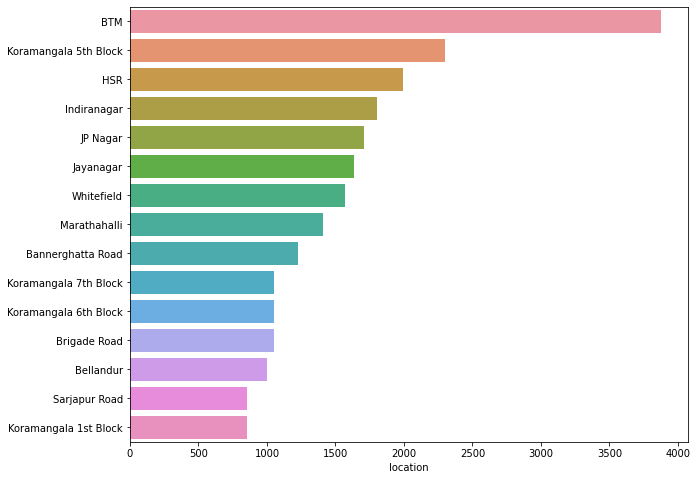

In [18]:
plt.figure(figsize = (10, 8))
sns.barplot(x = popular_locations, y = popular_locations.index)

The 5 most popular locations for restaurants are BTM, Koramangala 5th Block, HSR, Indiranagar, and JP Nagar, with BTM boasting of nearly 4000 eateries.

### Q2. Which locations have the best rated restaurants?

(We'll select only those locations which have a minimum of 50 restaurants.)

In [19]:

# groupby location and get the count of each location along with the average rating of restaurants in that location.
location_rating = df.groupby(by = ["location"])["rating"].agg(["count", "mean"])
location_rating.head()

,count,mean
location,,
BTM,3879,3.571410
Banashankari,744,3.649866
Banaswadi,468,3.496368
Bannerghatta Road,1226,3.509869
Basavanagudi,595,3.671092


In [20]:

# select the locations with 50 minimumn eateries and then sort them by their rating.
rated_locations = location_rating.loc[location_rating["count"] >= 50].sort_values(by = "mean", ascending = False)
# select the top 20 locations.
top20_rated_locations = rated_locations[:20]
top20_rated_locations.head()

,count,mean
location,,
Lavelle Road,481,4.141788
Koramangala 3rd Block,191,4.020419
St. Marks Road,343,4.017201
Koramangala 5th Block,2297,4.006661
Church Street,546,3.992125


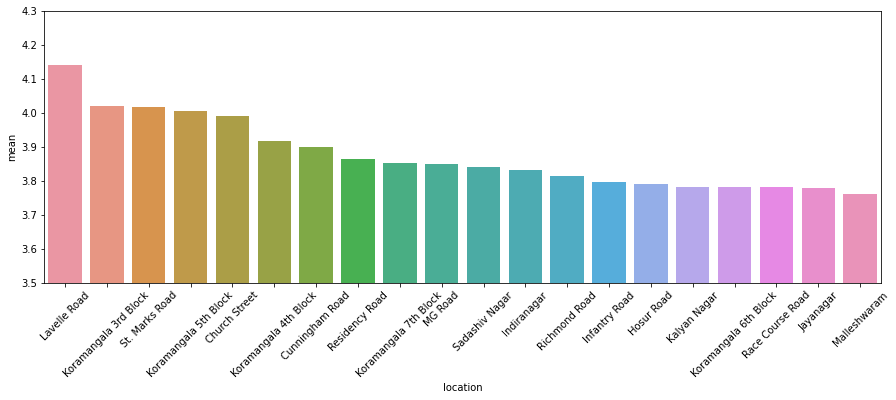

In [21]:

# plot the observations
plt.figure(figsize = (15, 5))
sns.barplot(x = top20_rated_locations.index, y = top20_rated_locations["mean"])
plt.xticks(rotation = 45)
plt.ylim(3.5, 4.3)
plt.show()

These are the top 20 locations in Bengaluru based on the eatries' ratings. The average rating in these locations range from 4.14 and 3.8.

### Q3. What relation does the rating and number of votes that a restaurant receives have? What about table booking and online order facility?

<AxesSubplot:xlabel='rating', ylabel='votes'>

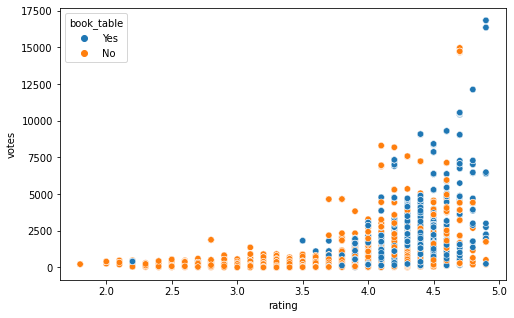

In [22]:

# Relationship between `rating`, `votes` and `book_table`
plt.figure(figsize = (8, 5))
sns.scatterplot(x = "rating", y = "votes", hue = "book_table", data = df, s = 40)

The number of votes look to be directly correlated with the rating of the restaurant, and they look to increase exponentially with the rating after a critical point. This is to be expected because better restaurants would atrract more customers and thus more votes. 

Also, the restaurants which don't provide booking facility are clustered in low ratings and less number of votes. In other words, more popular restaurants with high ratings are more likely to offer table booking facility, which can also be seen the following graph.

<AxesSubplot:xlabel='book_table', ylabel='rating'>

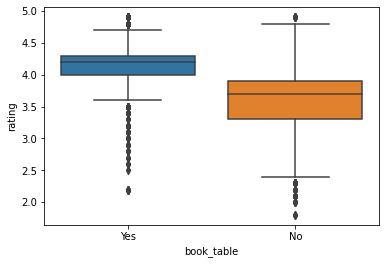

In [23]:
sns.boxplot(x = "book_table", y = "rating", data = df)

Now, we can look at the scatterplot for `rating`, `votes` and `online_order`

<AxesSubplot:xlabel='rating', ylabel='votes'>

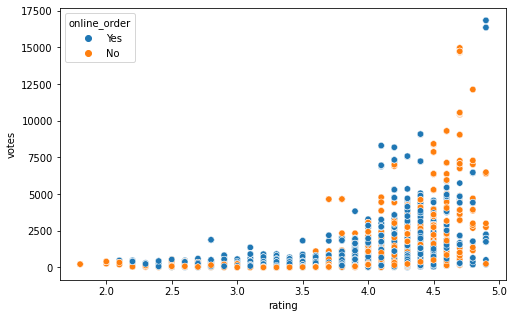

In [24]:

# Relationship between `rating`, `votes` and `online_order`
plt.figure(figsize = (8, 5))
sns.scatterplot(x = "rating", y = "votes", hue = "online_order", data = df, s = 40)

The data points for online order facility are scattered in the graph, and thus the data doesn't reveal any relationship between these variables. But, it may be worth exploring its relationship with the `votes` and the `rating` individually, which we'll do in the following sections.

### Q4. Is a restaurant which offers online order facility rated better?

<AxesSubplot:xlabel='online_order', ylabel='rating'>

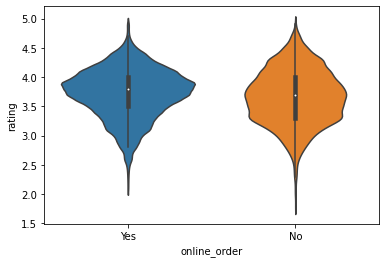

In [25]:
sns.violinplot(x = "online_order", y = "rating", data = df)

As discussed in the previous question, the rating doesn't seem to be any different between the restaurants which offer `online order` facility and which don't.

### Q5. Are restaurants offering expensive food rated better? Does a table booking facility make a difference?

<AxesSubplot:xlabel='rating', ylabel='cost_for_two_people'>

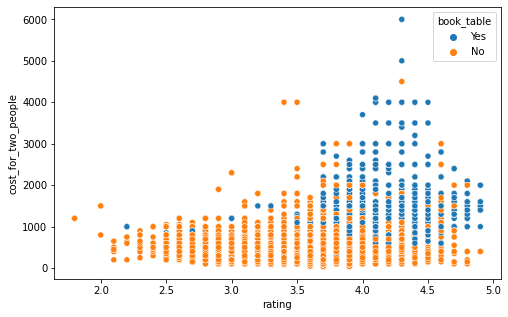

In [26]:
plt.figure(figsize = (8, 5))
sns.scatterplot(x = "rating", y = "cost_for_two_people", data = df, hue = 'book_table')

Although there are hints of an exponential relationship between the cost for two people and the rating of a restaurant, most of the data is clustered in low cost, and thus because of lack of data points for expensive restaurants, the data is inconclusive for this relations. But we can study `book table` facility individuallly with the `cost for two people`, where restaurants which offer `book_table` facility seem to be more expensive than restaurants which don't.

<AxesSubplot:xlabel='book_table', ylabel='cost_for_two_people'>

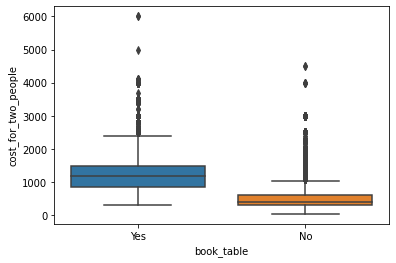

In [27]:
sns.boxplot(x = "book_table", y = "cost_for_two_people", data = df)

This graph also supports the idea that table booking is correlated with the cost for two people.

### Q6. Does the number of cuisines that a restaurant provides have a relation to the rating it recieves?

The cuisines column shows the all the cuisines that a restaurant offers. We can add column to the DataFrame to store the number of cuisines that a restaurant offers.

In [28]:
df["no_of_cuisines"] = df.cuisines.str.len()
df["no_of_cuisines"].head()

0    3
1    3
2    3
3    2
4    2
Name: no_of_cuisines, dtype: int64

<AxesSubplot:xlabel='no_of_cuisines', ylabel='rating'>

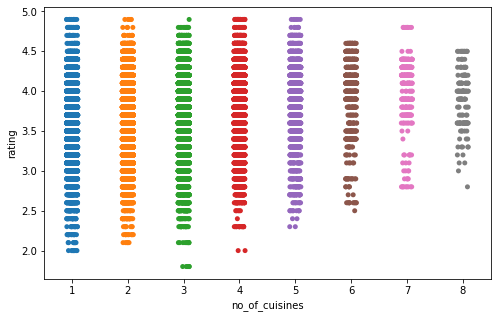

In [29]:
plt.figure(figsize = (8, 5))
sns.stripplot(x = "no_of_cuisines", y = "rating", data = df)

The rating seems to become more concentrated towards mean as the no. of cuisines that a restaurant offers goes up. But, this could also be a artifact of low no. of restaurants offering higher no. of cuisines. In general, the mean of rating also seems to go up with the increase in no. of cuisines, but the graph is inconclusive.
We'll explore this more in the boxplot.

<AxesSubplot:xlabel='no_of_cuisines', ylabel='rating'>

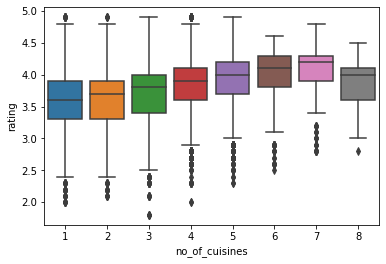

In [30]:
sns.boxplot(x = "no_of_cuisines", y = "rating", data = df)

This graph reflects the relationship better and does support the idea that restaurants offering more no of cuisines are usually rated better.

### Q7. How do Casual Dining and Fine Dining restaurants differ in their `cost_for_two_people`?

In [31]:

#Look at the dataframe
df.head()

,online_order,book_table,rating,votes,location,rest_type,cuisines,cost_for_two_people,type,listed_in(city),no_of_cuisines
0,Yes,Yes,4.1,775,Banashankari,[Casual Dining],"[North Indian, Mughlai, Chinese]",800.0,Buffet,Banashankari,3
1,Yes,No,4.1,787,Banashankari,[Casual Dining],"[Chinese, North Indian, Thai]",800.0,Buffet,Banashankari,3
2,Yes,No,3.8,918,Banashankari,"[Cafe, Casual Dining]","[Cafe, Mexican, Italian]",800.0,Buffet,Banashankari,3
3,No,No,3.7,88,Banashankari,[Quick Bites],"[South Indian, North Indian]",300.0,Buffet,Banashankari,2
4,No,No,3.8,166,Basavanagudi,[Casual Dining],"[North Indian, Rajasthani]",600.0,Buffet,Banashankari,2


We'll need to explode the `rest_type` column to extract information.

In [32]:

# extract information from `rest_type` column
rest_type_exploded = df.explode(column = "rest_type")
rest_type_exploded["rest_type"] = rest_type_exploded["rest_type"].str.strip()
rest_type_exploded.head()

,online_order,book_table,rating,votes,location,rest_type,cuisines,cost_for_two_people,type,listed_in(city),no_of_cuisines
0,Yes,Yes,4.1,775,Banashankari,Casual Dining,"[North Indian, Mughlai, Chinese]",800.0,Buffet,Banashankari,3
1,Yes,No,4.1,787,Banashankari,Casual Dining,"[Chinese, North Indian, Thai]",800.0,Buffet,Banashankari,3
2,Yes,No,3.8,918,Banashankari,Cafe,"[Cafe, Mexican, Italian]",800.0,Buffet,Banashankari,3
2,Yes,No,3.8,918,Banashankari,Casual Dining,"[Cafe, Mexican, Italian]",800.0,Buffet,Banashankari,3
3,No,No,3.7,88,Banashankari,Quick Bites,"[South Indian, North Indian]",300.0,Buffet,Banashankari,2


In [33]:

# separate data for casual dining restaurants and fine dining restaurants.
fine_dining_rest = rest_type_exploded.loc[rest_type_exploded.rest_type == "Fine Dining"]
casual_dining_rest = rest_type_exploded.loc[rest_type_exploded.rest_type == "Casual Dining"]

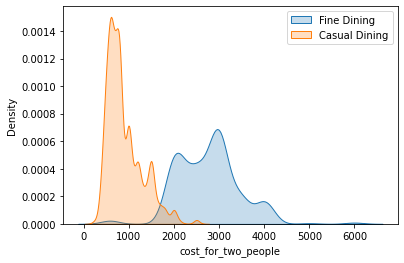

In [34]:

# plot the data
sns.kdeplot(fine_dining_rest.cost_for_two_people, fill = True)
sns.kdeplot(casual_dining_rest.cost_for_two_people, fill = True)
plt.legend(["Fine Dining", "Casual Dining"])
plt.show()

As expected, fine dining restaurants are much more expensive than casual dining restaurants. 

### Q8. How do Casual Dining and Fine Dining restaurants differ in their rating?

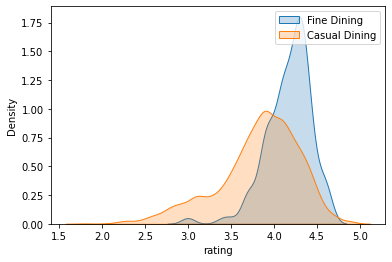

In [35]:
sns.kdeplot(fine_dining_rest.rating, fill = True)
sns.kdeplot(casual_dining_rest.rating, fill = True)
plt.legend(["Fine Dining", "Casual Dining"])
plt.show()

Fine dining restaurants are usually rated better and their ratings show much less variance than the ratings of casual dining restaurants.

### Q9. What are the five most common types of restaurants?

In [36]:

# Five most common types of restaurants
most_common_types_of_restaurants = rest_type_exploded.rest_type.value_counts()
most_common_types_of_restaurants.head()

Quick Bites       15144
Casual Dining     12188
Cafe               4604
Delivery           2946
Dessert Parlor     2695
Name: rest_type, dtype: int64

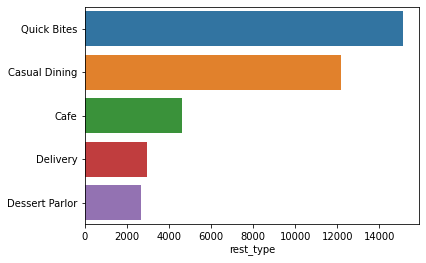

In [37]:
sns.barplot(x = most_common_types_of_restaurants.head(), y = most_common_types_of_restaurants.index[:5])
plt.show()

### Q10. What are the top 5 rated restaurants in `type` and `no_of_cuisines` combined?
In other words, which `type` and `no_of_cuisines` combinations gather the highest ratings?

In [38]:

# group and extract data for different `types` and `no of cuisines`
rating_data = df.groupby(by = ["type", "no_of_cuisines"])["rating"].agg("mean")
rating_data.head()

type    no_of_cuisines
Buffet  1                 3.995402
        2                 3.903509
        3                 3.911111
        4                 4.063212
        5                 4.217284
Name: rating, dtype: float64

Now, we'll make a 2D datarame out of this multiindexed pandas Series.

In [39]:
rating_data_df = rating_data.unstack()
rating_data_df.head()

no_of_cuisines,1,2,3,4,5,6,7,8
type,,,,,,,,
Buffet,3.995402,3.903509,3.911111,4.063212,4.217284,3.926667,3.500000,4.062500
Cafes,3.643697,3.760366,3.941109,3.938434,4.015942,4.090698,4.156757,4.084615
Delivery,3.593535,3.629772,3.654311,3.739603,3.817625,3.901439,3.999333,3.801149
Desserts,3.698520,3.772140,3.755556,3.934932,4.125610,4.084211,3.920000,4.060000
Dine-out,3.613442,3.603628,3.687592,3.825194,3.903406,4.006091,4.035433,3.982051


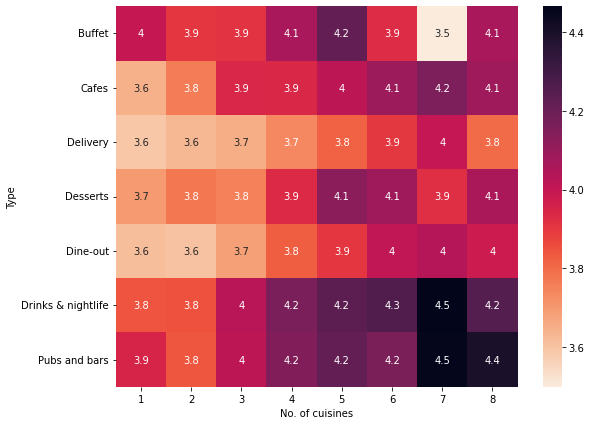

In [40]:

# plot the data
plt.figure(figsize = (9, 7))
fig = sns.heatmap(data = rating_data_df, annot = True, cmap = "rocket_r")
fig.set(xlabel = "No. of cuisines", ylabel = "Type")
plt.show()

From the plot, Pubs and bars which offer more than 3 cuisines are all rated high. Similarly, Drinks & nightlife restaurants with multiple cuisines are also rated really high.

We can get the top 5 combinations from the `rating_data` Series.

In [41]:

# top 5 combinations for `type` and `no_of_cuisines`
rating_data.sort_values(ascending = False).head()

type                no_of_cuisines
Drinks & nightlife  7                 4.464706
Pubs and bars       7                 4.455556
                    8                 4.400000
Drinks & nightlife  6                 4.264865
                    8                 4.250000
Name: rating, dtype: float64

### Q11. What is the relationship between the type and cost_for_two_people?

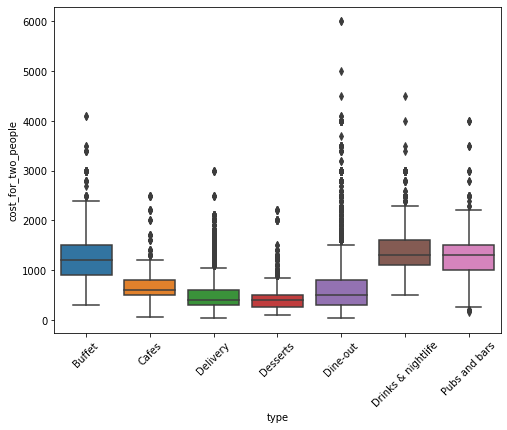

In [42]:
plt.figure(figsize = (8, 6))
sns.boxplot(x = "type", y = "cost_for_two_people", data = df)
plt.xticks(rotation = 45)
plt.show()

First thing to note is that there are quite a few outliers in the data, almost all of them offering much more expensive food from the rest of the distribution. 
Also buffet, drinks & nighlife, and pubs are much more expensive than eateries of the type desserts and delivery.

## Summary and Conclusion

Many questions could be asked and explored from the Zomato Dataset, but here we tried to answer 11 of them. We studied all the restaurants in Bengaluru, who have registered on Zomato, and tried to explore multiple variables' relationship with the restaurants' ratings. We also studied what factors go along with the food cost for two people in these restaurants. 


There are two important things to note here before making any conclusions. First, all the analysis we did might apply only to restaurants registered on Zomato and other similar online platforms, and might differ significantly if we explore the food industry offline. Second really important thing is all the relationships that we studied are correlational in nature. This project thus does not establish causal relationships, although it might suggest some and can be taken as an inspiration to conduct actual experimental studies to explore the variables discussed here. Keeping in mind this, we can look at what we actually did establish in this EDA of Zomato Dataset.

- The most popular places for restaurants in Benagluru are BTM, Koramangala 5th Block, HSR, Indiranagar, and JP Nagar, with BTM boasting of nearly 4000 eateries.
- The top 5 locations according to avg rating of restaurants are Lavelle Road, Koramangala 3rd Block, St. Marks Road, Koramangala 5th Block and Church Street.
- Restaurants with higher ratings have generally received more votes than the restaurants with lower rating and they are more likely to offer table booking facility.
- Also, restaurants offering table booking facility are also generally more expensive. 
- Restaurants offering more no. of cuisines are also on average rated better. 
- Fine dining restaurants are much more expensive than casual dining restaurants and they are also usually rated better with much less variance in the ratings. 
- Quick Bites and Casual Dining restaurants but are the most popular types of restaurant in Bengaluru on Zomato. 
-  Pubs and bars which offer more than 3 cuisines are all rated high. Similarly, Drinks & nightlife restaurants with multiple cuisines are also rated really highly.
- Buffet, drinks & nighlife, and pubs are much more expensive than eateries of the type desserts and delivery.
- For the other questions we asked, the data was more or less inconclusive. We may need more extensive data to answer those questions.

Apart from these inferences, many more interesting relationships can be studied and should be explored from this data. 

Thanks for reading.